### Importando as bibliotecas

In [1]:
import netpixi
from netpixi.integration.gt import Graph
from netpixi.integration.gt import *
import seaborn as sns
from regression.integration.gt import *

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


### Criando o grafo

In [2]:
g = Graph(directed=False) # não-dirigido

with open('david.txt', "r") as arquivo:
    teste = arquivo.readline()
    lista = []
    while teste:
        linha = teste.split()
        node1 = linha[0]
        node2 = linha[1]
            
        if node1 not in lista:
            lista.append(node1)
            g.add_vertex(node1)
        
        if node2 not in lista:
            lista.append(node2)
            g.add_vertex(node2)
        
        g.add_edge(node1, node2)
        
        teste = arquivo.readline()

### Salvando o grafo

In [3]:
gt_save(g, 'david.net.gz')

### Compilando e renderizando o grafo

In [4]:
g = gt_load('david.net.gz')
r = netpixi.render('david.net.gz')

### Melhorando visualmento o grafo

In [12]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

### Análise exploratória do grafo

In [13]:
# Números de vértices

n = g.num_vertices()
n

112

In [14]:
# Número de arestas

m = g.num_edges()
m

425

In [15]:
# Número máximo possível de arestas

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

6216

In [16]:
# Densidade

d = m / max_edges
d

0.06837194337194337

In [17]:
# Propriedades de cada vértice

data = gt_data(g)

In [18]:
# Degree

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['degree'] = degrees
data

,degree
id,
0,14
1,3
2,33
3,17
4,12
...,...
107,2
108,1
109,1


<AxesSubplot: xlabel='degree', ylabel='Count'>

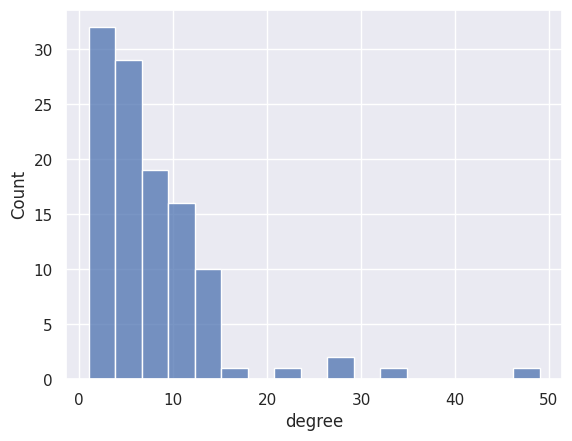

In [59]:
# Histograma do degree

sns.histplot(data['degree'])

In [60]:
# Describe do histograma

data['degree'].describe()

count    112.000000
mean       7.589286
std        6.881957
min        1.000000
25%        3.000000
50%        6.000000
75%       10.000000
max       49.000000
Name: degree, dtype: float64

### Limpando o grafo

In [54]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'david.net.gz')
netpixi.render('david.net.gz', infinite=True);

## Grafo de Centro e Periferia

In [55]:
import netpixi

from netpixi.integration.gt import *

g = gt_load('david.net.gz')

p = gt_draw.sfdp_layout(g)
gt_move(g, p)
gt_save(g, 'david_centro.net.gz')
r = netpixi.render('david_centro.net.gz')

In [56]:
import cpnet

from graph_tool import spectral

In [57]:
matrix = spectral.adjacency(g)

# Além de cpnet.Surprise, há outras
# opções de algoritmos discretos:
# cpnet.BE
# cpnet.Lip
# cpnet.LapCore
# cpnet.LapSgnCore
# cpnet.LowRankCore

algorithm = cpnet.Surprise()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('core')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['core'] = int(coreness)
    
# Vamos pintar de vermelho todos os vértices
# identificados como centro e de verde todos
# os vértices identificados como periferia.
    
for v in g.all_vertices():
    if v['core'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.

In [58]:
matrix = spectral.adjacency(g)

# Além de cpnet.Rombach, há outras
# opções de algoritmos contínuos:
# cpnet.MINRES
# cpnet.Rossa

algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

# Vamos usar coreness como referência para
# o tamanho dos vértices. Estabelecemos 10
# como o menor tamanho possível e 40 como
# o maior tamanho possível. Como o coreness
# está entre 0 e 1, a conta é bem simples.

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.